# Individual Data Exploration: Analyzing Bikeways in Los Angeles
For my data exploration, I am looking at a GEOJSON file created by the City of Los Angeles that maps all existing bike facilities on the streets of LA as well as the metadata associated with each bikeway. The file was last updated in November 2020, so it should be pretty up-to-date in regards to existing bike infrastructure in Los Angeles. Prior to starting this code, I have uploaded City_of_Los_Angeles_Bikeways.geojson onto my [week01 folder]()

First I import the geopandas module, which will allow me to visualize the geospatial data in the GEOJSON file.

In [1]:
# import geopandas module
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Next, I read and add the GEOJSON shapefile that I've uploaded into my repo folder, and I load it onto my Jupyter notebook as 'bikeways'.

In [2]:
# read and add shapefile to notebook
bikeways = gpd.read_file('City_of_Los_Angeles_Bikeways.geojson')

This command shows that the shapefile I've uploaded is a geographic dataframe.

In [3]:
# see data type
type(bikeways)

geopandas.geodataframe.GeoDataFrame

This command shows there are 6,773 rows and 39 columns to the dataset.

In [4]:
# see number of rows and columns in dataset
bikeways.shape

(6773, 39)

I want to see the information about the dataframe, as seen with the command below. It's quite lengthy as there are 39 columns of data.

In [5]:
# see info of dataframe 
bikeways.info

<bound method DataFrame.info of       OBJECTID_12  SECT_ID                       STREET_DES   OTHER  \
0               1  3548700                       Avenue III           
1               2  3548600                       Avenue III           
2               3  3548600                       Avenue III           
3               4  3548800                       Avenue III           
4               5  6739300                     Local Street  S RDWY   
...           ...      ...                              ...     ...   
6768         7029  5473700  Scenic Major Highway - Class II           
6769         7030  5473900  Scenic Major Highway - Class II           
6770         7031  5473700  Scenic Major Highway - Class II           
6771         7032  5473900  Scenic Major Highway - Class II           
6772         7033  5473500  Scenic Major Highway - Class II           

              STR_FROM                 STR_TO ST_TYPE  WIDTH_  CL_Miles  \
0               6TH ST   4TH PL / SANTA 

After that, I visualize the first five rows of the dataframe as a table to get a better sense of the data.

In [6]:
# look at pandas dataframe
bikeways.head()

,OBJECTID_12,SECT_ID,STREET_DES,OTHER,STR_FROM,STR_TO,ST_TYPE,WIDTH_,CL_Miles,Lane_Miles,...,Comments,Tag,Level_Protection,Level_ProtectionNotes,Level_Protetion2,Project_Name,Year_,Shape__Length,GlobalID,geometry
0,1,3548700,Avenue III,,6TH ST,4TH PL / SANTA FE AV,,0.0,0.067215,0.134431,...,,1.0,0.0,None,0,None,2019.0,354.897441,110d2e43-5f4a-4faa-af3d-3aa23a7a3d1b,"LINESTRING Z (-118.23294 34.04017 0.00000, -11..."
1,2,3548600,Avenue III,,6TH ST,4TH PL / SANTA FE AV,,0.0,0.051044,0.102089,...,,2.0,0.0,None,0,None,2019.0,269.514341,dbe20dba-a276-4724-90e7-b97197e67a4a,"LINESTRING Z (-118.23311 34.04119 0.00000, -11..."
2,3,3548600,Avenue III,,6TH ST,4TH PL / SANTA FE AV,,0.0,0.019490,0.038979,...,,3.0,0.0,None,0,None,2019.0,102.905742,40f564ba-03b0-4562-90e9-19c69778fe77,"LINESTRING Z (-118.23299 34.04045 0.00000, -11..."
3,4,3548800,Avenue III,,6TH ST,4TH PL / SANTA FE AV,,0.0,0.056009,0.112019,...,,4.0,0.0,None,0,None,2019.0,295.730268,8caa44c8-d8ae-4bd8-8d3e-fd2a903eaa7d,"LINESTRING Z (-118.23283 34.03920 0.00000, -11..."
4,5,6739300,Local Street,S RDWY,HOBART BL,WESTERN AV,Local,30.0,0.066304,0.066304,...,,6.0,0.0,None,0,None,2005.0,350.087190,40087818-8960-48f0-959b-031af4aa4dbe,"LINESTRING Z (-118.30786 33.94680 0.00000, -11..."


Since the bikeways dataframe contains geospatial data, I can also plot this information to get a visual sense of what I'm working with. In this case I am displaying all existing bikeways in LA (albeit without the map base layer). As we can see there are four general clusters of bikeways: The Valley, the Westside, Central/South LA, and San Pedro/Wilmington.

<AxesSubplot:>

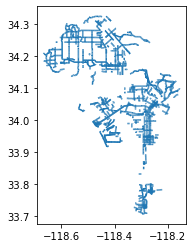

In [7]:
# visualize bikeways plot
bikeways.plot()

Next, I want to create a base map by using Folium. That way I can visualize this plot within the context of LA, rather than just floating lines on a white background.

However, it looks like plotting lines into folium is much more complicated than plotting the points we did in lab. I'd love to hear if anyone knows a straightforward way to do  this! For now we will have to use the 'bikeways.plot()' visual as-is.

In [8]:
bikeways.geometry

0       LINESTRING Z (-118.23294 34.04017 0.00000, -11...
1       LINESTRING Z (-118.23311 34.04119 0.00000, -11...
2       LINESTRING Z (-118.23299 34.04045 0.00000, -11...
3       LINESTRING Z (-118.23283 34.03920 0.00000, -11...
4       LINESTRING Z (-118.30786 33.94680 0.00000, -11...
                              ...                        
6768    LINESTRING Z (-118.65577 34.18967 0.00000, -11...
6769    LINESTRING Z (-118.65573 34.18557 0.00000, -11...
6770    LINESTRING Z (-118.65536 34.18809 0.00000, -11...
6771    LINESTRING Z (-118.65585 34.18466 0.00000, -11...
6772    LINESTRING Z (-118.65693 34.19411 0.00000, -11...
Name: geometry, Length: 6773, dtype: geometry

Next, I sample five entries (rows) from the dataset.

In [9]:
bikeways.sample(5)

,OBJECTID_12,SECT_ID,STREET_DES,OTHER,STR_FROM,STR_TO,ST_TYPE,WIDTH_,CL_Miles,Lane_Miles,...,Comments,Tag,Level_Protection,Level_ProtectionNotes,Level_Protetion2,Project_Name,Year_,Shape__Length,GlobalID,geometry
5401,5542,4764000,Secondary Highway,,101ST ST,102ND ST,Select,56.0,0.063336,0.126672,...,,5513.0,0.0,None,0,None,2013.0,334.414940,0029f48d-daf4-4a5b-84d6-5c0b2fdf2689,"LINESTRING Z (-118.26953 33.94468 0.00000, -11..."
4330,4434,4972600,Major Highway - Class II,,SALE AV,MAYNARD AV,Select,62.0,0.126412,0.252824,...,,4379.0,0.0,None,0,None,2005.0,667.453228,7471ec98-3e94-43a9-8a12-e616bef880ee,"LINESTRING Z (-118.61908 34.20100 0.00000, -11..."
5129,5251,6100000,Major Highway - Class II,,ARMINTA ST,STAGG ST,Select,80.0,0.056167,0.112334,...,,5206.0,0.0,None,0,None,2005.0,296.561152,28f47baa-03f0-46cc-9fdc-544c7f08b756,"LINESTRING Z (-118.48368 34.21278 0.00000, -11..."
3702,3785,4332000,Secondary Highway,,CIRRUS WY,CANDLEWOOD WY,Select,66.0,0.079862,0.159723,...,,3589.0,0.0,None,0,None,2005.0,421.668520,0256a06c-c66c-45d1-893c-2a38dd2d230f,"LINESTRING Z (-118.63936 34.20180 0.00000, -11..."
5063,5185,6553000,Secondary Highway,,MAIN ST,BROADWAY,Select,40.0,0.250308,0.500616,...,,5140.0,0.0,None,0,None,2011.0,1321.627198,7d7741bd-173b-42bb-869c-e5c3ca654d02,"LINESTRING Z (-118.27397 33.99651 0.00000, -11..."


Now I am isolating for level of protection columns in the dataset, and determining the counts for each type. The value counts for 'Level_Protection' column tell me that 6474 out of 6773 entries are zero, which I believe means that they are unprotected bike lanes.

In [10]:
# creating a query for temporary bikeway treatments
lvl_prot = ['Level_Protection', 'Level_Protetion2']
bikeways[lvl_prot].sample(5)

,Level_Protection,Level_Protetion2
2268,0.0,0
4345,0.0,0
1417,0.0,0
5994,0.0,0
6667,1.0,Temporary Treatments


In [11]:
# value counts for 'Level_Protection' column
bikeways[lvl_prot].value_counts()

Level_Protection  Level_Protetion2                          
0.0               0                                             6375
1.0               Temporary Treatments                           220
2.0               Parking                                         49
4.0               Temporary Treatments / Parking                  13
5.0                Parking / Bus Boarding Islands                  8
7.0               Bus Boarding Islands                             3
0.0               Temporary Treatments                             1
3.0               Permanent Civil Separation                       1
6.0               Parking Treatments / Bus Boarding Islands        1
dtype: int64

In [12]:
# value counts for 'Level_Protetion2' column
bikeways['Level_Protection'].value_counts()

0.0    6474
1.0     220
2.0      49
4.0      13
5.0       8
7.0       3
3.0       1
6.0       1
Name: Level_Protection, dtype: int64

In [13]:
bikeways['Level_ProtectionNotes'].value_counts()

BALLARDS                                   17
W/B Only. No Protection EB                  5
S/B                                         4
N/B                                         4
S/B Only                                    4
W/B Only. No Protection E/B                 4
W/B Only                                    3
 Intersection                               3
K71's W/B only                              2
NB                                          2
K71s for N/B                                2
K71s / Parking for S/B.  Bus Island N/B     2
Parking Protection for SB W/S of Street     1
N/B Only                                    1
W/B Only                                    1
Jog Intersection                            1
Parking Protection S/B                      1
WB Only. No Protection EB                   1
Parking Protection SB                       1
K71s E/B Only                               1
N/B Zicla Platform                          1
Name: Level_ProtectionNotes, dtype

After that, I create a query to remove the '...' column, which doesn't appear to contain any meaningful metadata. I copy the resulting new dataset into 'bikeways_temp'.

In [14]:
# creating subset query removing '...'
desired_columns = ['OBJECTID_12', 'SECT_ID', 'STREET_DES', 'OTHER', 'STR_FROM', 'STR_TO', 'ST_TYPE', 'WIDTH_', 'CL_Miles', 'Lane_Miles', 'Comments', 'Tag', 'Level_Protection', 'Level_ProtectionNotes', 'Level_Protetion2', 'Project_Name','Year_','Shape__Length', 'GlobalID', 'geometry']
bikeways_temp = bikeways[desired_columns].copy()
bikeways_temp

,OBJECTID_12,SECT_ID,STREET_DES,OTHER,STR_FROM,STR_TO,ST_TYPE,WIDTH_,CL_Miles,Lane_Miles,Comments,Tag,Level_Protection,Level_ProtectionNotes,Level_Protetion2,Project_Name,Year_,Shape__Length,GlobalID,geometry
0,1,3548700,Avenue III,,6TH ST,4TH PL / SANTA FE AV,,0.0,0.067215,0.134431,,1.0,0.0,None,0,None,2019.0,354.897441,110d2e43-5f4a-4faa-af3d-3aa23a7a3d1b,"LINESTRING Z (-118.23294 34.04017 0.00000, -11..."
1,2,3548600,Avenue III,,6TH ST,4TH PL / SANTA FE AV,,0.0,0.051044,0.102089,,2.0,0.0,None,0,None,2019.0,269.514341,dbe20dba-a276-4724-90e7-b97197e67a4a,"LINESTRING Z (-118.23311 34.04119 0.00000, -11..."
2,3,3548600,Avenue III,,6TH ST,4TH PL / SANTA FE AV,,0.0,0.019490,0.038979,,3.0,0.0,None,0,None,2019.0,102.905742,40f564ba-03b0-4562-90e9-19c69778fe77,"LINESTRING Z (-118.23299 34.04045 0.00000, -11..."
3,4,3548800,Avenue III,,6TH ST,4TH PL / SANTA FE AV,,0.0,0.056009,0.112019,,4.0,0.0,None,0,None,2019.0,295.730268,8caa44c8-d8ae-4bd8-8d3e-fd2a903eaa7d,"LINESTRING Z (-118.23283 34.03920 0.00000, -11..."
4,5,6739300,Local Street,S RDWY,HOBART BL,WESTERN AV,Local,30.0,0.066304,0.066304,,6.0,0.0,None,0,None,2005.0,350.087190,40087818-8960-48f0-959b-031af4aa4dbe,"LINESTRING Z (-118.30786 33.94680 0.00000, -11..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6768,7029,5473700,Scenic Major Highway - Class II,,KITTRIDGE ST,HAMLIN ST,Select,80.0,0.054003,0.108005,,3731.0,0.0,None,0,Resurfacing 22/22,2021.0,285.133785,e28e5ccc-b4f3-48bb-86a2-3d9b519d4747,"LINESTRING Z (-118.65577 34.18967 0.00000, -11..."
6769,7030,5473900,Scenic Major Highway - Class II,,VALLEY CIRCLE TE,VICTORY BL,Select,80.0,0.063629,0.127259,,3831.0,0.0,None,0,Resurfacing 22/22,2021.0,335.962447,d6c97ab3-40b7-4866-a377-486c00a667c4,"LINESTRING Z (-118.65573 34.18557 0.00000, -11..."
6770,7031,5473700,Scenic Major Highway - Class II,,KITTRIDGE ST,HAMLIN ST,Select,80.0,0.112990,0.225980,,4990.0,0.0,None,0,Resurfacing 22/22,2021.0,596.587646,3708bbb8-d6c5-4867-aaae-f7dba8793820,"LINESTRING Z (-118.65536 34.18809 0.00000, -11..."
6771,7032,5473900,Scenic Major Highway - Class II,,VALLEY CIRCLE TE,VICTORY BL,Select,80.0,0.062978,0.125956,,4991.0,0.0,None,0,Resurfacing 22/22,2021.0,332.524100,fa75a078-e085-426f-87bd-2941652df1f5,"LINESTRING Z (-118.65585 34.18466 0.00000, -11..."


I want to create another query to see which bikeway infrastructure are not permanent. This filter shows that 221 entries are temporary treatments.

In [15]:
# creating new table with query filtering for 'Temporary Treatments' within 'Level_Protetion2' column
bikeways_temp.query("Level_Protetion2 == 'Temporary Treatments'")

,OBJECTID_12,SECT_ID,STREET_DES,OTHER,STR_FROM,STR_TO,ST_TYPE,WIDTH_,CL_Miles,Lane_Miles,Comments,Tag,Level_Protection,Level_ProtectionNotes,Level_Protetion2,Project_Name,Year_,Shape__Length,GlobalID,geometry
22,23,1963900,Major Highway - Class II,,28TH ST,28TH ST,Select,67.0,0.036473,0.072946,S/B,25.0,1.0,None,Temporary Treatments,MY FIG PROJECT,2018.0,192.578384,5e4829d2-5cf2-4d3a-8af8-9f4655e50938,"LINESTRING Z (-118.27704 34.02655 0.00000, -11..."
23,24,1964900,Avenue I,,37TH ST,STATE DR,,0.0,0.076163,0.076163,N/B,5273.0,1.0,N/B,Temporary Treatments,MY FIG PROJECT,2018.0,402.139775,ccef31eb-c1cd-4b69-ad88-345275d12a5b,"LINESTRING Z (-118.28274 34.01761 0.00000, -11..."
24,25,5783500,Unidentified,None,DEWEY ST,AIRPORT AVE,None,NaN,0.032486,0.032486,None,NaN,1.0,N/B,Temporary Treatments,None,NaN,171.525426,33c6a559-36e4-4b10-94d5-79e4e56c0b93,"LINESTRING Z (-118.45632 34.00984 0.00000, -11..."
44,46,4332600,Major Highway - Class II,,VANOWEN ST,WELBY WY,Select,80.0,0.039644,0.079289,None,46.0,1.0,None,Temporary Treatments,None,2019.0,209.321865,da983b6e-56d9-47ee-83b9-b7d3192ada32,"LINESTRING Z (-118.64252 34.19268 0.00000, -11..."
193,200,1963000,Major Highway - Class II,,WASHINGTON BL,20TH ST,Select,67.0,0.109943,0.219886,S/B,477.0,1.0,None,Temporary Treatments,MY FIG PROJECT,2018.0,580.500157,51211e30-3a3d-414e-9b4e-7c8f88579080,"LINESTRING Z (-118.27205 34.03438 0.00000, -11..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,6911,0737800,Scenic Major Highway - Class II,W RDWY,103RD ST,104TH ST,Select,45.0,0.062498,0.062498,S/B,3344.0,1.0,None,Temporary Treatments,VZ,2021.0,329.991415,da41e01e-d5ed-4489-b303-39150878e7ce,"LINESTRING Z (-118.27836 33.94283 0.00000, -11..."
6677,6920,0739300,Scenic Major Highway - Class II,E RDWY,110TH ST,111TH ST,Select,45.0,0.059856,0.059856,N/B,4293.0,1.0,None,Temporary Treatments,VZ,2021.0,316.038788,b50e6927-ada3-4c48-a6fe-cd3164e686f3,"LINESTRING Z (-118.27815 33.93565 0.00000, -11..."
6679,6922,0737900,Scenic Major Highway - Class II,E RDWY,104TH ST,105TH ST,Select,45.0,0.062524,0.062524,N/B,4295.0,1.0,None,Temporary Treatments,VZ,2021.0,330.128028,8c65fa42-83e9-4827-9d5e-cc004bc759c7,"LINESTRING Z (-118.27816 33.94193 0.00000, -11..."
6680,6923,0737200,Scenic Major Highway - Class II,W RDWY,CENTURY BL,101ST ST,Select,45.0,0.062506,0.062506,S/B,4296.0,1.0,None,Temporary Treatments,VZ,2021.0,330.033609,96e6ecc0-1bcf-4a0b-aeaf-06fdc310e385,"LINESTRING Z (-118.27836 33.94555 0.00000, -11..."


### Conclusion

In summary, I have learned from the bikeways dataset that the vast majority of bikeways in the city of Los Angeles, though permanent, do not have any physical barriers or protections for bike riders. Visualizing the dataset in a plot also shows that there are extensive gaps between four different clusters of bikeways. These gaps in bike infrastructure may be potential hotspots of bike traffic collisions that I should look into further once I overlay this data with a base map and LAPD's records of traffic collisions. Another next step is to load census tract data to determine whether there is a statistically significant correlation between bike infrastructure and neighborhood income. 